In [1]:
import pandas as pd
df=pd.read_csv("ALL1000_adelita.csv")
df_bis=pd.read_csv("Top1000_adelita.csv")
df_bis.shape

(6000, 3)

In [2]:
import matplotlib.pyplot as plt
scenario_counts = {}
for row in df_bis.itertuples():
  sector, scenario = row.Secteur, row.Scenario
  if sector not in scenario_counts:
    scenario_counts[sector] = {}
  scenario_counts[sector][scenario] = scenario_counts[sector].get(scenario, 0) + 1

# Define colors for the bars (optional)
  # Adjust as needed for more sectors
data=scenario_counts
data


{1: {3: 157, 15: 142, 11: 671, 2: 30},
 2: {3: 449, 15: 383, 2: 71, 11: 97},
 3: {11: 909, 3: 61, 15: 27, 2: 3},
 4: {11: 531, 3: 170, 15: 185, 2: 85, 9: 15, 10: 14},
 5: {11: 792, 3: 81, 15: 88, 2: 33, 9: 2, 10: 4},
 6: {11: 323, 3: 328, 15: 284, 2: 65}}

In [4]:
m

matrix([[ 30,  71,   3,  85,  33,  65],
        [157, 449,  61, 170,  81, 328],
        [  0,   0,   0,  15,   2,   0],
        [  0,   0,   0,  14,   4,   0],
        [671,  97, 909, 531, 792, 323],
        [142, 383,  27, 185,  88, 284]])

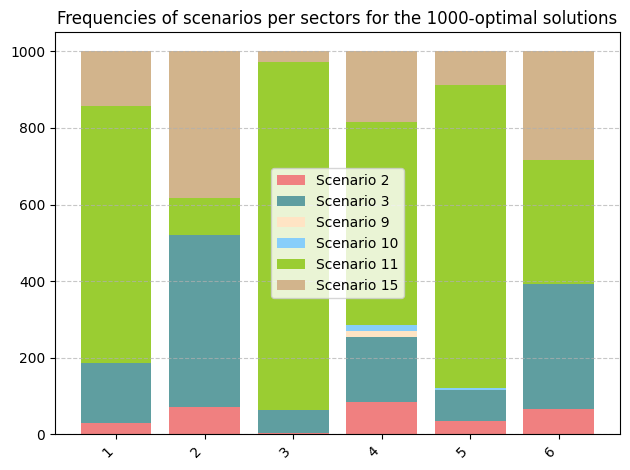

In [12]:
import matplotlib.pyplot as plt
import numpy as np


# Extract keys and values from the dictionary
keys = list(data.keys())
values = list(data.values())

# Separate data for each inner dictionary with zeros for missing keys
inner_data = []
for value in values:
    # Get all unique keys from the entire data dictionary
    all_keys = set(key for inner_dict in data.values() for key in inner_dict.keys())
    # Create a list with zeros for missing keys and values for existing keys
    inner_data.append([value.get(key, 0) for key in all_keys])

# 
m=np.matrix(inner_data).T

y1=np.array(m[0,:])[0]
y2=np.array(m[1,:])[0]
y3=np.array(m[2,:])[0]
y4=np.array(m[3,:])[0]
y5=np.array(m[4,:])[0]
y6=np.array(m[5,:])[0]

plt.bar(keys, y1, color='lightcoral')
plt.bar(keys, y2, bottom=y1, color='cadetblue')
plt.bar(keys, y3, bottom=y1+y2, color='bisque')
plt.bar(keys, y4, bottom=y1+y2+y3, color='lightskyblue')
plt.bar(keys, y5, bottom=y1+y2+y3+y4, color='yellowgreen')
plt.bar(keys, y6, bottom=y1+y2+y3+y4+y5, color='tan')

plt.legend(["Scenario "+str(i) for i in list(set(df_bis['Scenario'].values))])
plt.title("Frequencies of scenarios per sectors for the 1000-optimal solutions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements

plt.show()


In [7]:
df=df[['Rank',  'Scenario', 'CA_expr',
       'CMO_expr', 'CV_expr', 'Secteur'] ]
df=df.drop_duplicates()
df.shape


(6000, 6)

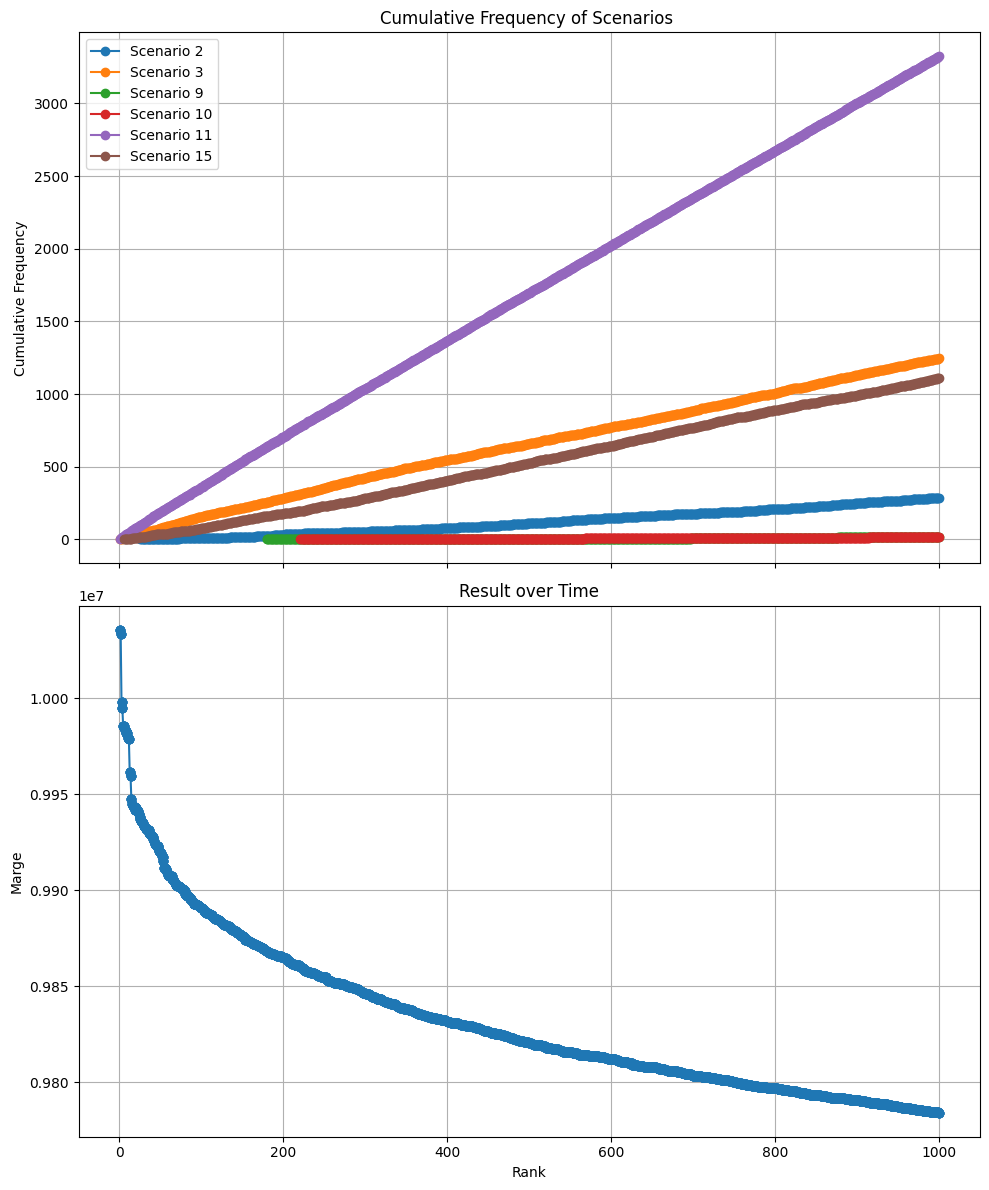

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Assuming your DataFrame is named df
# If your DataFrame is named differently, replace df with your DataFrame name

# Filter the DataFrame for Rank values from 1 to 100
df_filtered = df

# Group by Rank and Scenario, count occurrences, and reset index
scenario_counts = df_filtered.groupby(['Rank', 'Scenario']).size().reset_index(name='Frequency')

# Calculate cumulative frequency
scenario_counts['Cumulative Frequency'] = scenario_counts.groupby('Scenario')['Frequency'].cumsum()

# Pivot the DataFrame for easier plotting
pivot_df = scenario_counts.pivot(index='Rank', columns='Scenario', values='Cumulative Frequency').fillna(method='ffill')

# Interpolate missing values for smoother curves
smooth_df = pivot_df.interpolate(method='cubic')

# Plotting both plots in a single figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plotting smoothed cumulative frequency of scenarios over time
for column in smooth_df.columns:
    ax1.plot(smooth_df.index, smooth_df[column], marker='o', linestyle='-', label=f'Scenario {column}')

ax1.set_title('Cumulative Frequency of Scenarios ')
ax1.set_ylabel('Cumulative Frequency')
ax1.legend()
ax1.grid(True)

# Plotting CA_expr over time
ax2.plot(df['Rank'], df['CA_expr'] - df['CMO_expr'] - df['CV_expr'], marker='o', linestyle='-')
ax2.set_title('Result over Time')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Marge')
ax2.grid(True)

plt.tight_layout()
plt.show()
